## Fully-convolutional CNN

Testing with multiple input shapes.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Reshape,Activation
from tensorflow.keras.layers import Conv2D,Flatten,RepeatVector,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import PIL
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_train = x_train[y_train <= 3] # using numbers 0,..,3
y_train = y_train[y_train <= 3]
x_train = np.expand_dims(x_train,axis=-1)
x_train,y_train = x_train[:24600],y_train[:24600]
x_train.shape,y_train.shape

((24600, 28, 28, 1), (24600,))

In [3]:
x_train = x_train/255 # scaling the images

In [4]:
x_subset = np.array([np.array(PIL.Image.fromarray(x_train[i,:,:,0]).resize(size=(32,32))) for i in [0,1,2,4]])

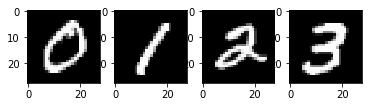

In [5]:
plt.subplot(1,4,1)
plt.imshow(x_train[0][:,:,0],cmap="gray")
plt.subplot(1,4,2)
plt.imshow(x_train[1][:,:,0],cmap="gray")
plt.subplot(1,4,3)
plt.imshow(x_train[2][:,:,0],cmap="gray")
plt.subplot(1,4,4)
plt.imshow(x_train[4][:,:,0],cmap="gray")
plt.show()

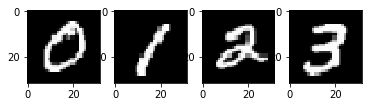

In [6]:
plt.subplot(1,4,1)
plt.imshow(x_subset[0,:,:],cmap="gray")
plt.subplot(1,4,2)
plt.imshow(x_subset[1,:,:],cmap="gray")
plt.subplot(1,4,3)
plt.imshow(x_subset[2,:,:],cmap="gray")
plt.subplot(1,4,4)
plt.imshow(x_subset[3,:,:],cmap="gray")
plt.show()

In [7]:
def get_model():
    """ Fully-convolutional CNN
    """
    x = Input(shape=(28,28,1))
    h = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',activation='relu')(x) # 14x14x32
    h = Conv2D(filters=16,kernel_size=3,strides=2,padding='valid',activation='relu')(h) # 6x6x16
    h = Conv2D(filters=4,kernel_size=3,strides=2,padding='same',activation='sigmoid')(h) # 3x3x4; 4-classes
    h = GlobalAveragePooling2D()(h) # nx4
    h = Activation('softmax')(h)
    
    model = Model(inputs=x,outputs=h)
    model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(lr=0.01))
    return model

In [8]:
model = get_model()

In [9]:
batch_size=50
epochs=10

for epoch_i in range(epochs):
    losses = []
    for i in range(0,len(x_train),batch_size):
        x_train_subset = x_train[i:i+batch_size]
        y_train_subset = y_train[i:i+batch_size]
        batch_loss = model.train_on_batch(x_train_subset,y_train_subset)
        losses.append(float(batch_loss))
        
    print("Epoch {}: {}".format(epoch_i+1,round(sum(losses)/len(losses),6)))

Epoch 1: 0.989809
Epoch 2: 0.902887
Epoch 3: 0.877308
Epoch 4: 0.863671
Epoch 5: 0.857593
Epoch 6: 0.852044
Epoch 7: 0.848448
Epoch 8: 0.845271
Epoch 9: 0.843592
Epoch 10: 0.840858


In [10]:
np.argmax(model(np.array([x_train[0],x_train[1],x_train[2],x_train[4]])),axis=1)

array([0, 1, 2, 3])

In [11]:
model_ = Sequential(model.layers)

In [12]:
np.argmax(model_(np.expand_dims(x_subset,axis=-1)),axis=-1)

array([0, 1, 2, 3])